This notebook is dedicated to changes and improvements on my first data science project. We start as always, by importing the necessary libraries:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from fuzzywuzzy import process
pd.options.mode.chained_assignment = None  # default='warn'

Then we open the file with the venue's data.

In [2]:
df = pd.read_csv('OPEN DATA Locales-Epigrafes202002.csv', sep=';', encoding='latin-1', low_memory=False)
df.head()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,...,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
0,10000003,1,CENTRO,104,JUSTICIA,NaN,NaN,88,"440554,59","4475338,53",...,NaN,PB,NaN,VITACA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA
1,10000044,1,CENTRO,101,PALACIO,NaN,NaN,14,"439722,59","4473550,53",...,NaN,PB,NaN,V.M. VINOMANIA,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472502,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,10000071,1,CENTRO,106,SOL,NaN,NaN,119,"440388,59","4474077,53",...,NaN,PB,NaN,LA DESCUBIERTA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE
3,10000097,1,CENTRO,104,JUSTICIA,NaN,NaN,77,"440851,59","4474857,52",...,NaN,PB,NaN,BARRIGA LLENA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE
4,10000224,1,CENTRO,102,EMBAJADORES,NaN,NaN,35,0,0,...,Mercado Municipal,PB,70,SIN ROTULO,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472201,COMERCIO AL POR MENOR DE CARNICERIA


The next step is checking is we have null values using .isna(), that returns a boolean DataFrame indicating if the values are NA, combined with .sum() to obtain the number of missing values for each column.

In [3]:
df.isna().sum()

id_local                          0
id_distrito_local                 0
desc_distrito_local               0
id_barrio_local                   0
desc_barrio_local                 0
cod_barrio_local             163716
id_seccion_censal_local      163716
desc_seccion_censal_local         0
coordenada_x_local                0
coordenada_y_local                0
id_tipo_acceso_local         163716
desc_tipo_acceso_local            0
id_situacion_local           163716
desc_situacion_local              0
id_vial_edificio                  0
clase_vial_edificio               0
desc_vial_edificio                0
id_ndp_edificio                   0
id_clase_ndp_edificio             0
nom_edificio                      0
num_edificio                      0
cal_edificio                      0
secuencial_local_PC               0
id_vial_acceso               163716
clase_vial_acceso                 0
desc_vial_acceso                  0
id_ndp_acceso                     0
id_clase_ndp_acceso         

We can see that that some columns are completely empty and others are almost empty. We can use the missingno and matplotlib.pyplot packages to visualize a missingness matrix.

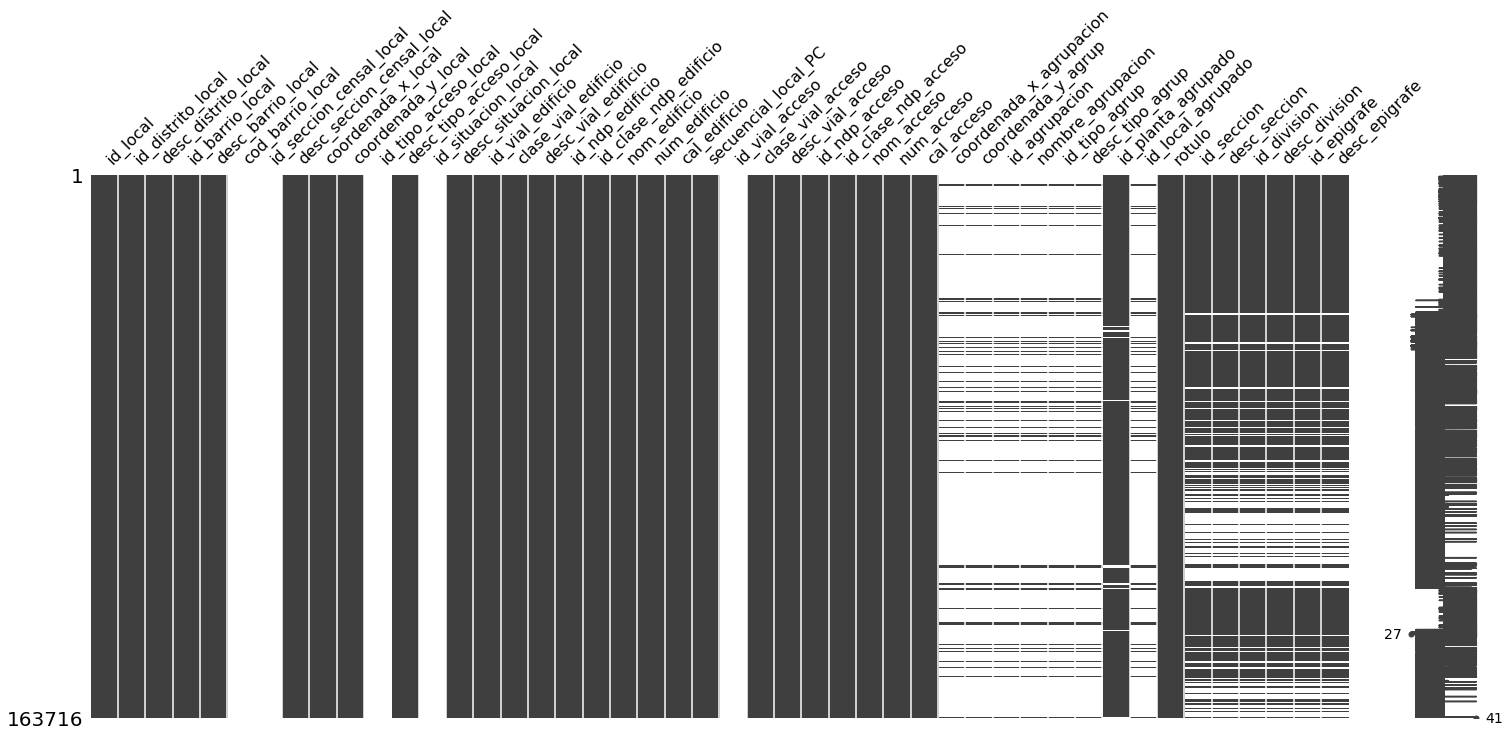

In [4]:
msno.matrix(df)
plt.show()

After checking for missing values, we select the columns that we need for the analysis:
- id_local: venue id
- desc_situacion_local: indicates if the venue is open, closed, used as a home
- desc_distrito_local: name of the district where the venue is located
- desc_barrio_local: name of the neighborhood where the venue is located
- desc_seccion: activity section
- desc_division: activity division
- desc_epigrafe: activity

In [5]:
columnas = ['id_local', 'desc_situacion_local', 'desc_distrito_local', 'desc_barrio_local', 'desc_seccion', 'desc_division', 'desc_epigrafe']

In [6]:
df = df[columnas]
df.head()

,id_local,desc_situacion_local,desc_distrito_local,desc_barrio_local,desc_seccion,desc_division,desc_epigrafe
0,10000003,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,CAFETERIA
1,10000044,Abierto,CENTRO,PALACIO,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,10000071,Abierto,CENTRO,SOL,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
3,10000097,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
4,10000224,Abierto,CENTRO,EMBAJADORES,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE CARNICERIA


We check again the number of null values.

In [7]:
df.isna().sum()

id_local                    0
desc_situacion_local        0
desc_distrito_local         0
desc_barrio_local           0
desc_seccion            41102
desc_division           41102
desc_epigrafe           41105
dtype: int64

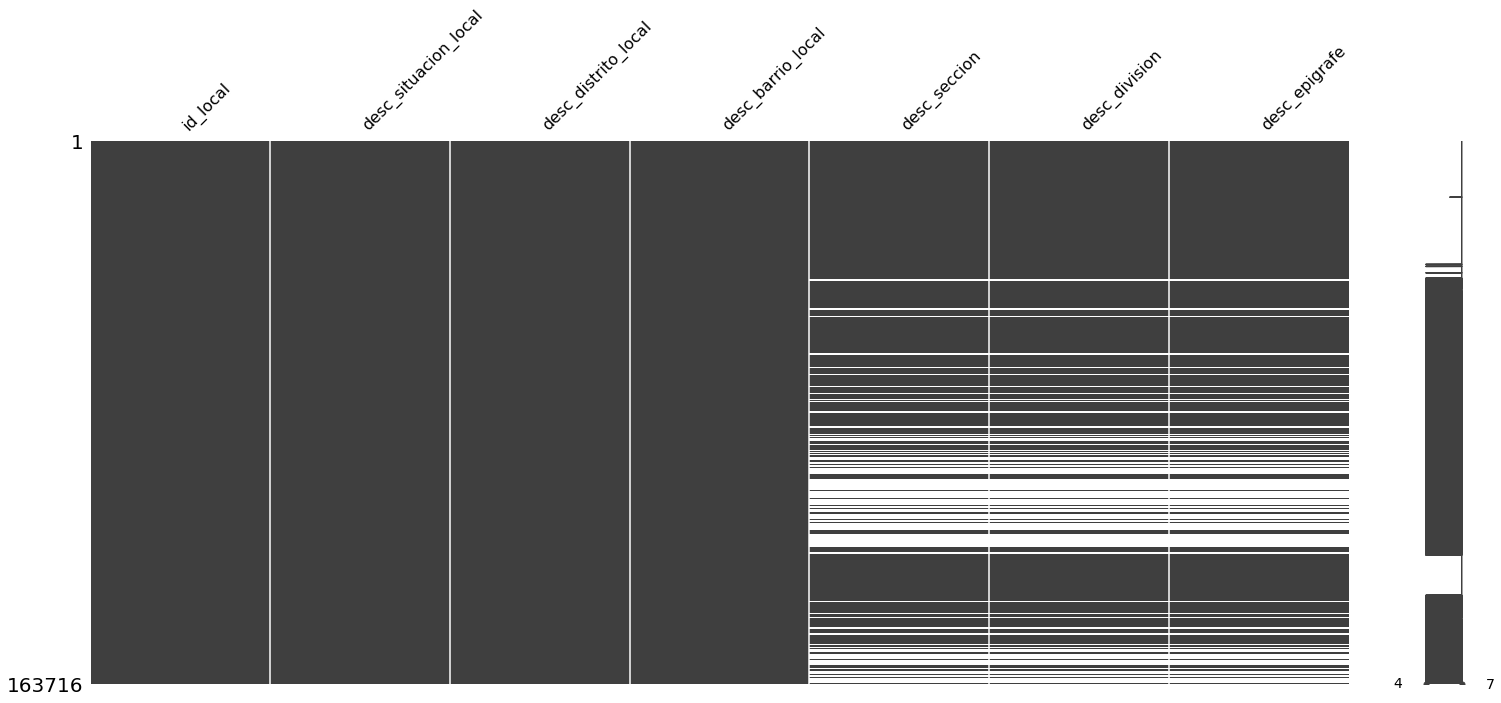

In [8]:
msno.matrix(df)
plt.show()

We decide to keep only the open ('Abierto') venues.

In [9]:
df = df[df['desc_situacion_local'] == 'Abierto']

In [10]:
df.isna().sum()

id_local                   0
desc_situacion_local       0
desc_distrito_local        0
desc_barrio_local          0
desc_seccion            1709
desc_division           1709
desc_epigrafe           1712
dtype: int64

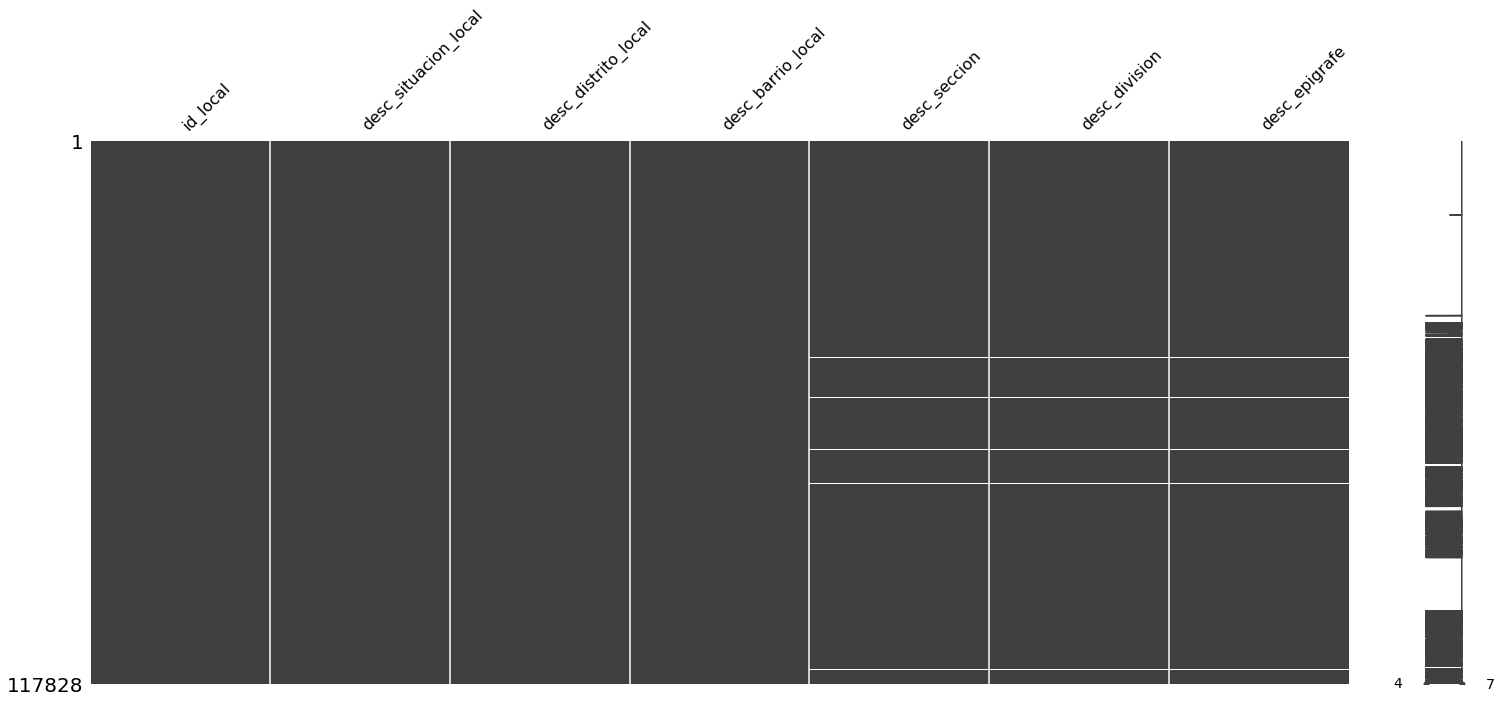

In [11]:
msno.matrix(df)
plt.show()

We still have a few null values, so we drop them.

In [12]:
df = df.dropna()
df.head()

,id_local,desc_situacion_local,desc_distrito_local,desc_barrio_local,desc_seccion,desc_division,desc_epigrafe
0,10000003,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,CAFETERIA
1,10000044,Abierto,CENTRO,PALACIO,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,10000071,Abierto,CENTRO,SOL,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
3,10000097,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
4,10000224,Abierto,CENTRO,EMBAJADORES,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE CARNICERIA


The next step will be to check if we have duplicate values in the 'id_local' column using .duplicated() and keeping all the duplicates.

In [13]:
dup = df.duplicated('id_local', keep=False)
dup.head()

0     True
1    False
2     True
3    False
4    False
dtype: bool

We use dup to filter the DataFrame and keep only the rows with duplicate id's.

In [14]:
dup_df = df[dup].sort_values('id_local')
dup_df.head()

,id_local,desc_situacion_local,desc_distrito_local,desc_barrio_local,desc_seccion,desc_division,desc_epigrafe
0,10000003,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,CAFETERIA
45,10000003,Abierto,CENTRO,JUSTICIA,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,BAR RESTAURANTE
2,10000071,Abierto,CENTRO,SOL,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
64,10000071,Abierto,CENTRO,SOL,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,CAFETERIA
55,10000102,Abierto,CENTRO,SOL,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...","COMERCIO AL POR MENOR DE PASTELERIA, CONFITERI..."


We check the 15 most common activities of the duplicated venues

In [15]:
dup_df['desc_epigrafe'].value_counts().head(15)

CAFETERIA                                                                                                                                 1276
COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO ESPECIALIZADOS, CON PREDOMINIO EN PRODUCTOS ALIMENTICIOS, BEBIDAS Y TABACO (AUTOSERVICIO)     978
CENTRO DE ESTETICA                                                                                                                         919
SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL                                                                   885
SERVICIO DE PELUQUERIA                                                                                                                     840
COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PANADERIA Y BOLLERIA CON OBRADOR                                                               737
COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR                                                                                   706

We think that the first row correspond to the primary activity that the venue performs, so we decide to keep them. Let's check the activities.

In [16]:
dup = df.duplicated('id_local', keep='first')
dup_df = df[dup]
dup_df['desc_epigrafe'].value_counts().head(15)

CAFETERIA                                                                                                                                 746
CENTRO DE ESTETICA                                                                                                                        654
COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO ESPECIALIZADOS, CON PREDOMINIO EN PRODUCTOS ALIMENTICIOS, BEBIDAS Y TABACO (AUTOSERVICIO)    485
COMERCIO AL POR MENOR DE CHARCUTERIA                                                                                                      447
COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR                                                                                  435
COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PANADERIA Y BOLLERIA CON OBRADOR                                                              428
SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL                                                                  398
ESCUEL

We see the activity 'SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL' (catering service in schools and childcare centers) that actually is a secondary activity, so maybe the primary activities aren't in the first row. Let's see what happens in we keep the last duplicate rows.

In [17]:
dup = df.duplicated('id_local', keep='last')
dup_df = df[dup]
dup_df['desc_epigrafe'].value_counts().head(15)

COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO ESPECIALIZADOS, CON PREDOMINIO EN PRODUCTOS ALIMENTICIOS, BEBIDAS Y TABACO (AUTOSERVICIO)    693
CAFETERIA                                                                                                                                 677
SERVICIO DE PELUQUERIA                                                                                                                    624
SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL                                                                  563
COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PANADERIA Y BOLLERIA CON OBRADOR                                                              504
COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR                                                                                  481
COMERCIO AL POR MENOR DE CHARCUTERIA                                                                                                      387
COMERC

The value count of 'SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL' is much higher, so we have to keep the first duplicated rows.

In [18]:
df = df.drop_duplicates('id_local', keep='first', inplace=False)
df['desc_epigrafe'].value_counts().head(15)

SERVICIO DE PELUQUERIA                                                                                                                    4732
BAR CON COCINA                                                                                                                            4183
BAR RESTAURANTE                                                                                                                           4045
COMERCIO AL POR MENOR DE PRENDAS DE VESTIR EN ESTABLECIMIENTOS ESPECIALIZADOS                                                             3953
RESTAURANTE                                                                                                                               2448
CAFETERIA                                                                                                                                 2337
OTRO COMERCIO AL POR MENOR DE PRODUCTOS ALIMENTICIOS (PERECEDEROS Y NO PERECEDEROS) CON VENDEDOR N.C.O.P.                                 2091

When we check the descriptions of the most common activities, we find a few problems:
- Some are too long.
- Others are quite similar, like 'bar', 'bar con cocina' (bar with kitchen), 'bar sin cocina' (bar without kitchen), 'restaurant', 'bar restaurant'.
So we have to unify and translate the descriptions. To do that we create a dictionary called 'mappings'.

In [19]:
mappings = {'SERVICIO DE PELUQUERIA':'HAIRDRESSER', 
            'COMERCIO AL POR MENOR DE PRENDAS DE VESTIR EN ESTABLECIMIENTOS ESPECIALIZADOS':'CLOTHING STORE',
            'BAR CON COCINA':'BAR',
            'BAR RESTAURANTE':'RESTAURANTE',
            'OTRO COMERCIO AL POR MENOR DE PRODUCTOS ALIMENTICIOS (PERECEDEROS Y NO PERECEDEROS) CON VENDEDOR N.C.O.P.':'FOOD STORE',
            'INTERMEDIACION MONETARIA: BANCOS, CAJAS DE AHORRO':'BANK',
            'ACTIVIDADES ADMINISTRATIVAS Y AUXILIARES DE OFICINA Y SERVICIOS DE REPROGRAFIA':'OFFICE',
            'COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO ESPECIALIZADOS, CON PREDOMINIO EN PRODUCTOS ALIMENTICIOS, BEBIDAS Y TABACO (AUTOSERVICIO)':'SUPERMARKET',
            'COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR':'FRUIT STORE',
            "ENSEÑANZA NO REGLADA (DEPORTIVA Y RECREATIVA, CULTURAL, CLASES DE RECUPERACION, INFORMATICA)":'ACADEMY',
            'TALLER DE REPARACION DE AUTOMOVILES ESPECIALIZADO EN MECANICA Y ELECTRICIDAD':'CAR WORKSHOP',
            'INSTALACIONES ELECTRICAS, DE FONTANERIA Y OTRAS EN OBRAS DE CONSTRUCCION':'PLUMBING AND ELECTRICAL INSTALLATIONS',
            'COMERCIO AL POR MENOR DE PRODUCTOS DE PRECIO UNICO, BAZARES Y ASIMILABLES':'EURO STORE',
            'FARMACIA':'PHARMACY',
            'BAR SIN COCINA':'BAR',
            'CENTRO DE ESTETICA':'AESTHETIC CENTER'}

In [20]:
locales = df.copy()
locales['desc_epigrafe'] = locales['desc_epigrafe'].replace(mappings)

In [21]:
locales['desc_epigrafe'].value_counts().head(15)

RESTAURANTE                              6493
BAR                                      5628
HAIRDRESSER                              4732
CLOTHING STORE                           3953
CAFETERIA                                2337
FOOD STORE                               2091
BANK                                     2083
PHARMACY                                 1849
OFFICE                                   1841
SUPERMARKET                              1729
FRUIT STORE                              1702
ACADEMY                                  1651
CAR WORKSHOP                             1487
PLUMBING AND ELECTRICAL INSTALLATIONS    1436
AESTHETIC CENTER                         1245
Name: desc_epigrafe, dtype: int64

In [23]:
len(locales['desc_epigrafe'].unique())

433

The classification of the activities that perform the venues is based on the Epigraphs of economic activity. It has a hierarchical structure of sections, divisions and activities. We have 433 unique activities, too many to check them all, so we start checking the sections.

In [24]:
locales['desc_seccion'].value_counts()

COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI0N DE VEHICULOS DE MOTOR Y MOTOCICLETAS     39102
HOSTELERIA                                                                                18340
OTROS SERVICIOS                                                                           10810
ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES                                             4134
EDUCACI0N                                                                                  3716
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXLIARES                                          3170
INDUSTRIA MANUFACTURERA                                                                    2984
CONSTRUCCI0N                                                                               2785
ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS                                          2781
TRANSPORTE Y ALMACENAMIENTO                                                                2675
ACTIVIDADES FINANCIERAS Y DE SEGUROS    

One of the sections is 'Sin actividad', that means 'without activity'. We are not interested in venues without activity, so we drop the rows that contain this section.

In [25]:
locales= locales[locales['desc_seccion']!= 'SIN ACTIVIDAD']

In [26]:
len(locales['desc_epigrafe'].unique())

431

If we check again the number of unique activities, we see that now we have 431 instead of 433. Let's have a look now to the neighborhoods column, 'desc_barrio_local'.

In [22]:
locales.sort_values('desc_barrio_local', ascending=True).head()

,id_local,desc_situacion_local,desc_distrito_local,desc_barrio_local,desc_seccion,desc_division,desc_epigrafe
136110,270531494,Abierto,CARABANCHEL,ABRANTES,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,COMERCIO AL POR MAYOR DE MATERIAL Y APARATOS E...
5516,110002333,Abierto,CARABANCHEL,ABRANTES,HOSTELERIA,SERVICIOS DE COMIDAS Y BEBIDAS,RESTAURANTE
128579,270153885,Abierto,CARABANCHEL,ABRANTES,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...
128578,270153877,Abierto,CARABANCHEL,ABRANTES,OTROS SERVICIOS,"REPARACI0N DE ORDENADORES, EFECTOS PERSONALES ...",REPARACION DE CALZADO
128576,270153748,Abierto,CARABANCHEL,ABRANTES,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE CARNICERIA


In [40]:
locales['desc_barrio_local'].unique()

array(['JUSTICIA            ', 'PALACIO             ',
       'SOL                 ', 'EMBAJADORES         ',
       'CORTES              ', 'UNIVERSIDAD         ',
       'PALOS DE MOGUER     ', 'IMPERIAL            ',
       'DELICIAS            ', 'CHOPERA             ',
       'ACACIAS             ', 'LEGAZPI             ',
       'ATOCHA              ', 'IBIZA               ',
       'PACIFICO            ', 'LOS JERONIMOS       ',
       'NIÑO JESUS          ', 'ADELFAS             ',
       'ESTRELLA            ', 'RECOLETOS           ',
       'FUENTE DEL BERRO    ', 'LISTA               ',
       'GOYA                ', 'GUINDALERA          ',
       'CASTELLANA          ', 'PROSPERIDAD         ',
       'CIUDAD JARDIN       ', 'EL VISO             ',
       'NUEVA ESPAÑA        ', 'HISPANOAMERICA      ',
       'CASTILLA            ', 'CUATRO CAMINOS      ',
       'CASTILLEJOS         ', 'ALMENARA            ',
       'VALDEACEDERAS       ', 'BERRUGUETE          ',
       'BE

Most of the strings that represent the neighborhoods have a lot of extra white spaces, so we have to remove them. We also lower the strings to make them easier to combine with the other datasets used for the analysis.

In [41]:
locales['desc_barrio_local'] = locales['desc_barrio_local'].str.lower()
locales['desc_barrio_local'] = locales['desc_barrio_local'].str.strip()
unique_barrios = locales['desc_barrio_local'].sort_values().unique()
unique_barrios

array(['abrantes', 'acacias', 'adelfas', 'aeropuerto', 'alameda de osuna',
       'almagro', 'almenara', 'almendrales', 'aluche', 'amposta',
       'apostol santiago', 'arapiles', 'aravaca', 'arcos', 'arguelles',
       'atalaya', 'atocha', 'bellas vistas', 'berruguete', 'buenavista',
       'butarque', 'campamento', 'canillas', 'canillejas',
       'casa de campo', 'casco h.barajas', 'casco h.vallecas',
       'casco h.vicalvaro', 'castellana', 'castilla', 'castillejos',
       'chopera', 'ciudad jardin', 'ciudad universitaria', 'colina',
       'comillas', 'concepcion', 'corralejos', 'cortes', 'costillares',
       'cuatro caminos', 'cuatro vientos', 'delicias', 'el cañaveral',
       'el goloso', 'el pardo', 'el pilar', 'el plantio', 'el salvador',
       'el viso', 'embajadores', 'ensanche de vallecas', 'entrevias',
       'estrella', 'fontarron', 'fuente del berro', 'fuentelarreina',
       'gaztambide', 'goya', 'guindalera', 'hellin', 'hispanoamerica',
       'horcajo', 'ibiza', 

Let's have a look at the population data.

In [42]:
file = '31105dbs.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Distritos - Barrios', 'Secciones']


In [43]:
df = xl.parse('Distritos - Barrios')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población
0,011. Palacio,45.105190,10.001047,37.284051,1.954046,47.116254,21483.0
1,012. Embajadores,42.588063,10.236172,29.897280,2.016749,47.211251,43312.0
2,013. Cortes,44.603419,8.746671,32.939221,1.907738,49.132435,10092.0
3,014. Justicia,43.724197,10.356446,32.177076,1.945774,49.133641,15886.0
4,015. Universidad,43.640620,9.423621,32.220221,1.932032,48.727863,29749.0


In [44]:
df.columns

Index(['barrios', 'Edad media de la población',
       'Porcentaje de población menor de 18 años',
       'Porcentaje de población de 65 y más años', 'Tamaño medio del hogar',
       'Porcentaje de hogares unipersonales', 'Población'],
      dtype='object')

Let's check the unique values for the 'barrios' (neighborhoods) column.

In [45]:
df['barrios'].unique()

array(['   011. Palacio', '   012. Embajadores', '   013. Cortes',
       '   014. Justicia', '   015. Universidad', '   016. Sol',
       '   021. Imperial', '   022. Acacias', '   023. Chopera',
       '   024. Legazpi', '   025. Delicias', '   026. Palos de Moguer',
       '   027. Atocha', '   031. Pacífico', '   032. Adelfas',
       '   033. Estrella', '   034. Ibiza', '   035. Jerónimos',
       '   036. Niño Jesús', '   041. Recoletos', '   042. Goya',
       '   043. Fuente del Berro', '   044. Guindalera', '   045. Lista',
       '   046. Castellana', '   051. El Viso', '   052. Prosperidad',
       '   053. Ciudad Jardín', '   054. Hispanoamérica',
       '   055. Nueva España', '   056. Castilla',
       '   061. Bellas Vistas', '   062. Cuatro Caminos',
       '   063. Castillejos', '   064. Almenara', '   065. Valdeacederas',
       '   066. Berruguete', '   071. Gaztambide', '   072. Arapiles',
       '   073. Trafalgar', '   074. Almagro', '   075. Ríos Rosas',
       '

In order to combine both datasets, we need that neighborhoods names look the same in both DataFrames. We can lower the strings and strip the white spaces and the numbers in the 'barrios' column, but for the rest of changes we will have to use the fuzzywuzzy library. To keep track of the changes we are going to add a new column to the DataFrame.

In [46]:
df['b'] = df['barrios'].str.lower()
df['b'] = df['b'].str.strip()
df.b = df.b.str.replace('[0-9]. ','')
df.b = df.b.str.replace('[0-9]','')

In [47]:
df['b'].unique()

array(['palacio', 'embajadores', 'cortes', 'justicia', 'universidad',
       'sol', 'imperial', 'acacias', 'chopera', 'legazpi', 'delicias',
       'palos de moguer', 'atocha', 'pacífico', 'adelfas', 'estrella',
       'ibiza', 'jerónimos', 'niño jesús', 'recoletos', 'goya',
       'fuente del berro', 'guindalera', 'lista', 'castellana', 'el viso',
       'prosperidad', 'ciudad jardín', 'hispanoamérica', 'nueva españa',
       'castilla', 'bellas vistas', 'cuatro caminos', 'castillejos',
       'almenara', 'valdeacederas', 'berruguete', 'gaztambide',
       'arapiles', 'trafalgar', 'almagro', 'ríos rosas', 'vallehermoso',
       'el pardo', 'fuentelarreina', 'peñagrande', 'pilar', 'la paz',
       'valverde', 'mirasierra', 'el goloso', 'casa de campo',
       'argüelles', 'ciudad universitaria', 'valdezarza', 'valdemarín',
       'el plantío', 'aravaca', 'los cármenes', 'puerta del angel',
       'lucero', 'aluche', 'campamento', 'cuatro vientos', 'las águilas',
       'comillas', 'opa

In [48]:
df.head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población,b
0,011. Palacio,45.105190,10.001047,37.284051,1.954046,47.116254,21483.0,palacio
1,012. Embajadores,42.588063,10.236172,29.897280,2.016749,47.211251,43312.0,embajadores
2,013. Cortes,44.603419,8.746671,32.939221,1.907738,49.132435,10092.0,cortes
3,014. Justicia,43.724197,10.356446,32.177076,1.945774,49.133641,15886.0,justicia
4,015. Universidad,43.640620,9.423621,32.220221,1.932032,48.727863,29749.0,universidad


Until now I've been replicating the code provided in the Datacamp course [Data Cleaning in Python](https://learn.datacamp.com/courses/data-cleaning-in-python), but in this case I think it can be used only if we have just a few categorical values, so I'm going to use the code provided in this excellent Medium [article](https://medium.com/analytics-vidhya/matching-messy-pandas-columns-with-fuzzywuzzy-4adda6c7994f) written by [Khalid EL MOULOUDI](https://github.com/kelmouloudi) to compare the array unique_barrios to df.b

In [49]:
from fuzzywuzzy import process

u_barrios = []
similarity = []

for barrio in df.b:
        ratio = process.extract( barrio, unique_barrios, limit=1)
        u_barrios.append(ratio[0][0])
        similarity.append(ratio[0][1])

df['u_barrios'] = pd.Series(u_barrios)

df['similarity'] = pd.Series(similarity)

df.head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población,b,u_barrios,similarity
0,011. Palacio,45.105190,10.001047,37.284051,1.954046,47.116254,21483.0,palacio,palacio,100
1,012. Embajadores,42.588063,10.236172,29.897280,2.016749,47.211251,43312.0,embajadores,embajadores,100
2,013. Cortes,44.603419,8.746671,32.939221,1.907738,49.132435,10092.0,cortes,cortes,100
3,014. Justicia,43.724197,10.356446,32.177076,1.945774,49.133641,15886.0,justicia,justicia,100
4,015. Universidad,43.640620,9.423621,32.220221,1.932032,48.727863,29749.0,universidad,universidad,100


It looks like the process has worked. To make sure, we are going to sort df by the similarity values in ascending order.

In [50]:
df.sort_values(by='similarity', ascending=True).head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población,b,u_barrios,similarity
17,035. Jerónimos,47.927343,12.834347,68.095180,2.468555,32.387270,6839.0,jerónimos,los jeronimos,79
111,181. Casco Histórico de Vallecas,35.822967,23.349857,24.491010,2.522078,29.613058,79171.0,casco histórico de vallecas,alameda de osuna,86
128,213. Casco Histórico de Barajas,43.863305,12.875224,44.230263,2.404861,30.878175,7249.0,casco histórico de barajas,alameda de osuna,86
114,191. Casco Histórico de Vicálvaro,37.776849,24.112848,30.713297,2.803763,21.019329,51026.0,casco histórico de vicálvaro,alameda de osuna,86
129,214. Timón,37.309253,22.377836,27.146370,2.642924,25.553290,10991.0,timón,timon,89


We have a problem with the neighborhoods that include 'casco histórico de' (Old Town) on their names. In the **desc_barrio_local** column 'histórico' is abbreviated ('h.') but not in **barrios** column. We need to replace 'histórico de ' with 'h.' and repeat the process.

In [51]:
df['b'] = df['b'].str.replace('histórico de ', 'h.')

In [52]:
u_barrios = []
similarity = []

for barrio in df.b:
        ratio = process.extract( barrio, unique_barrios, limit=1)
        u_barrios.append(ratio[0][0])
        similarity.append(ratio[0][1])

df['u_barrios'] = pd.Series(u_barrios)

df['similarity'] = pd.Series(similarity)

df.head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población,b,u_barrios,similarity
0,011. Palacio,45.105190,10.001047,37.284051,1.954046,47.116254,21483.0,palacio,palacio,100
1,012. Embajadores,42.588063,10.236172,29.897280,2.016749,47.211251,43312.0,embajadores,embajadores,100
2,013. Cortes,44.603419,8.746671,32.939221,1.907738,49.132435,10092.0,cortes,cortes,100
3,014. Justicia,43.724197,10.356446,32.177076,1.945774,49.133641,15886.0,justicia,justicia,100
4,015. Universidad,43.640620,9.423621,32.220221,1.932032,48.727863,29749.0,universidad,universidad,100


In [53]:
df.sort_values(by='similarity', ascending=True).head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población,b,u_barrios,similarity
17,035. Jerónimos,47.927343,12.834347,68.095180,2.468555,32.387270,6839.0,jerónimos,los jeronimos,79
129,214. Timón,37.309253,22.377836,27.146370,2.642924,25.553290,10991.0,timón,timon,89
46,084. Pilar,47.885955,12.154383,70.623753,2.373826,30.066860,45597.0,pilar,el pilar,90
119,202. Hellín,47.669198,13.644603,62.516942,2.396051,31.918877,8782.0,hellín,hellin,91
76,125. Moscardó,43.811689,14.785553,52.133774,2.596086,29.807332,24843.0,moscardó,moscardo,93


It's look like everything is fine, the only columns we need are **u_barrios**, **Edad media de la población** (Average Age) and **Población** (Population), so we filter the DataFrame.

In [54]:
population = df[['u_barrios', 'Edad media de la población', 'Población']]
population.head()

,u_barrios,Edad media de la población,Población
0,palacio,45.105190,21483.0
1,embajadores,42.588063,43312.0
2,cortes,44.603419,10092.0
3,justicia,43.724197,15886.0
4,universidad,43.640620,29749.0


To check if the neighborhood values are the same in both DataFrames, we sort the unique values in both columns and compare both arrays.

In [55]:
barrios_unique = population.u_barrios.sort_values().unique()

In [56]:
np.array_equal(unique_barrios, barrios_unique)

True

The process would be the same for the average income dataset and for the coordinates dataset. Other thing that I want to change and improve is the code that I used to create new categorical values for population, average age and average income. I'm going to use **.cut()** to create the categorical values for population.

In [57]:
label_ranges = [0, 15000, 30000, 45000, 65000, 80000]
label_names = ['low_pop', 'low_mid_pop', 'middle_pop', 'mid_high_pop', 'high_pop']

population['pop_labels'] = pd.cut(population['Población'], bins = label_ranges, 
                                labels = label_names)
population.head()

,u_barrios,Edad media de la población,Población,pop_labels
0,palacio,45.105190,21483.0,low_mid_pop
1,embajadores,42.588063,43312.0,middle_pop
2,cortes,44.603419,10092.0,low_pop
3,justicia,43.724197,15886.0,low_mid_pop
4,universidad,43.640620,29749.0,low_mid_pop


That's all for now.